In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
%matplotlib inline

In [2]:
from sklearn import preprocessing, model_selection, ensemble, metrics, decomposition

In [3]:
import xgboost

In [4]:
matplotlib.__version__

'2.0.0'

In [5]:
def read_data(filename):
    data = pd.read_csv(filename, header=0, sep=';', encoding='pt154')
    data = data.rename(index=str, columns={'client_id': '_ID_', 'open_acount_flg': '_VAL_'})
    return data

In [6]:
train = read_data('../data/credit_train.csv')
test = read_data('../data/credit_test.csv')

### open_account_flg

(array([ 140690.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   30056.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

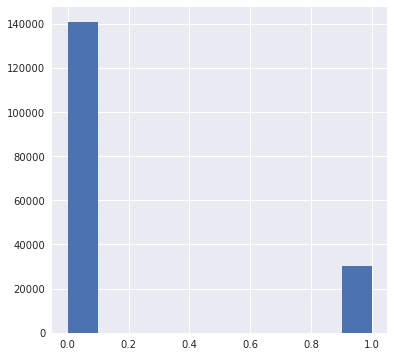

In [7]:
plt.figure(figsize=(6, 6))
plt.hist(train.open_account_flg)

In [8]:
train.open_account_flg.value_counts()

0    140690
1     30056
Name: open_account_flg, dtype: int64

### gender

In [8]:
train.gender = train.gender.map({'F': 1, 'M': 0})
test.gender = test.gender.map({'F': 1, 'M': 0})

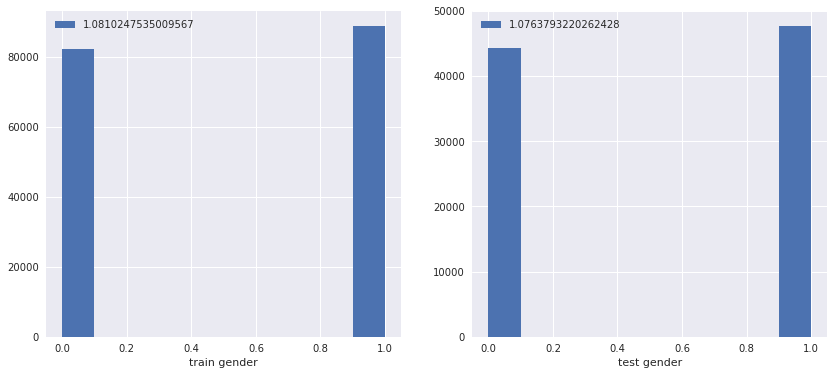

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.gender)
plt.xlabel('train gender')
train_patch = mpatches.Patch(label = '{}'.format(
    train.gender.value_counts().iloc[0] / train.gender.value_counts().iloc[1]))
plt.legend(handles=[train_patch])

plt.subplot(1, 2, 2)
plt.hist(test.gender)
plt.xlabel('test gender')
test_patch = mpatches.Patch(label = '{}'.format(
    test.gender.value_counts().iloc[0] / test.gender.value_counts().iloc[1]))
plt.legend(handles=[test_patch])

### age

In [18]:
print(np.unique(train.age), 
      np.unique(test.age),
      len(set(train.age).union(test.age)), sep='\n')

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71]
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71]
54


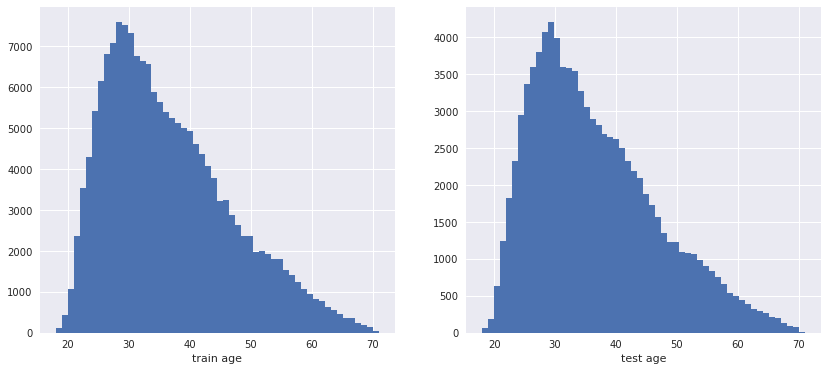

In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.age, bins=54)
plt.xlabel('train age')

plt.subplot(1, 2, 2)
plt.hist(test.age, bins=54)
plt.xlabel('test age')

### marital_status

In [20]:
train.marital_status = train.marital_status.map({'UNM': 0, 'DIV': 1, 'MAR': 2, 'WID': 3, 'CIV': 4})
test.marital_status = test.marital_status.map({'UNM': 0, 'DIV': 1, 'MAR': 2, 'WID': 3, 'CIV': 4})

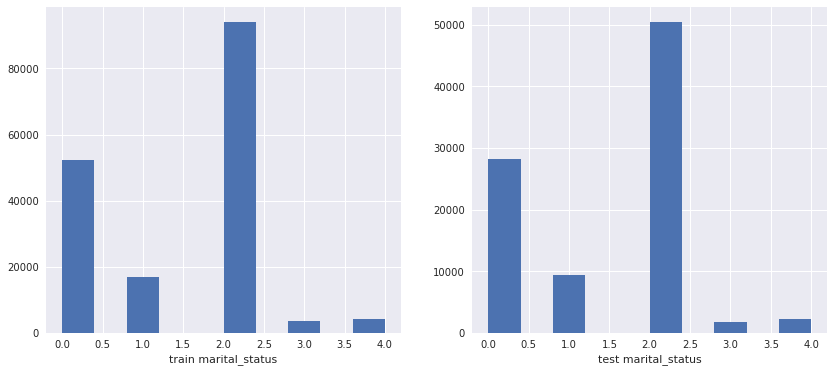

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.marital_status)
plt.xlabel('train marital_status')

plt.subplot(1, 2, 2)
plt.hist(test.marital_status)
plt.xlabel('test marital_status')

### job_position

In [25]:
job_positions = dict((y, x) for x, y in enumerate(['SPC', 'DIR', 'HSK', 'INV', 'WOI', 'WRK', 
                                                   'ATP', 'WRP', 'UMN', 'NOR', 'PNS', 'BIS', 
                                                   'INP', 'BIU', 'ONB', 'PNA', 'PNI', 'PNV']))
train.job_position = train.job_position.map(job_positions)
test.job_position = test.job_position.map(job_positions)

In [26]:
len(np.unique(train.job_position))

18

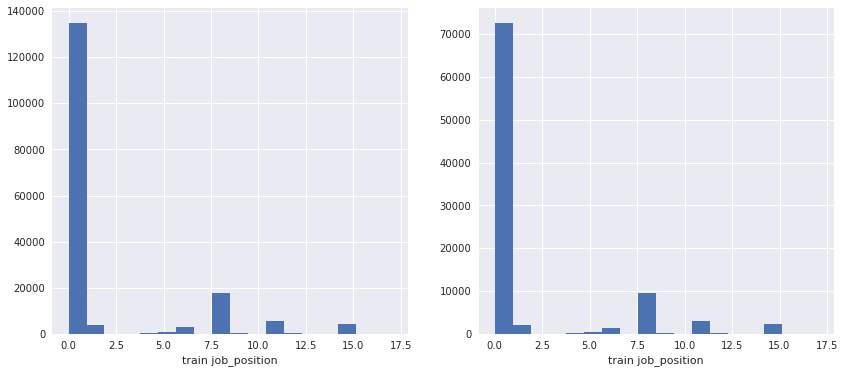

In [27]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.job_position, bins=18)
plt.xlabel('train job_position')

plt.subplot(1, 2, 2)
plt.hist(test.job_position, bins=18)
plt.xlabel('train job_position')

### credit_sum

In [28]:
train.credit_sum = train.credit_sum.apply(lambda x: x.replace(',', '.')).astype(np.float64)
test.credit_sum = test.credit_sum.apply(lambda x: x.replace(',', '.')).astype(np.float64)

In [29]:
train.credit_sum = train.credit_sum.apply(lambda x: np.round(x / 1000))
test.credit_sum = test.credit_sum.apply(lambda x: np.round(x / 1000))

In [30]:
print(len(np.unique(train.credit_sum)), len(np.unique(test.credit_sum)))
print(np.unique(train.credit_sum))
print(np.unique(test.credit_sum))

145 128
[   3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.
   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.
   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.
   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.
   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.
   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.   74.
   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.
   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.   98.
   99.  100.  102.  103.  105.  106.  107.  108.  109.  110.  112.  113.
  115.  116.  117.  118.  119.  120.  122.  123.  128.  129.  130.  131.
  132.  133.  134.  135.  140.  141.  143.  146.  150.  153.  155.  156.
  159.  169.  171.  174.  176.  177.  178.  180.  185.  188.  190.  195.
  200.]
[   3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.
   15.   16.   17.   18.   19.   20

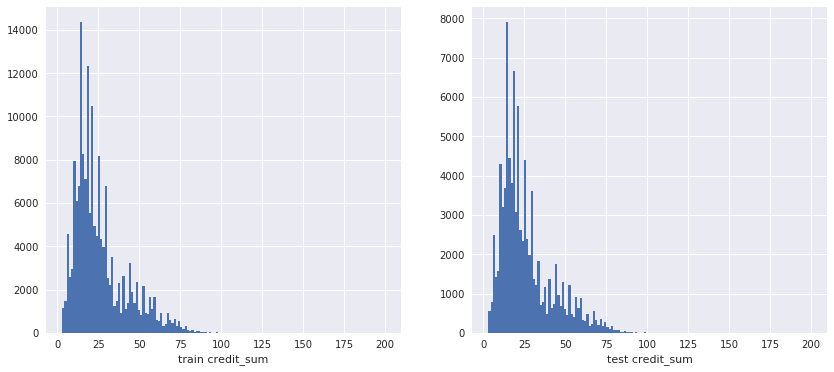

In [31]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.credit_sum, bins=145)
plt.xlabel('train credit_sum')

plt.subplot(1, 2, 2)
plt.hist(test.credit_sum, bins=145)
plt.xlabel('test credit_sum')

### credit_month

In [32]:
print(len(np.unique(train.credit_month)), len(np.unique(test.credit_month)))
print(np.unique(train.credit_month))
print(np.unique(test.credit_month))

31 29
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 36]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 28
 30 31 32 36]


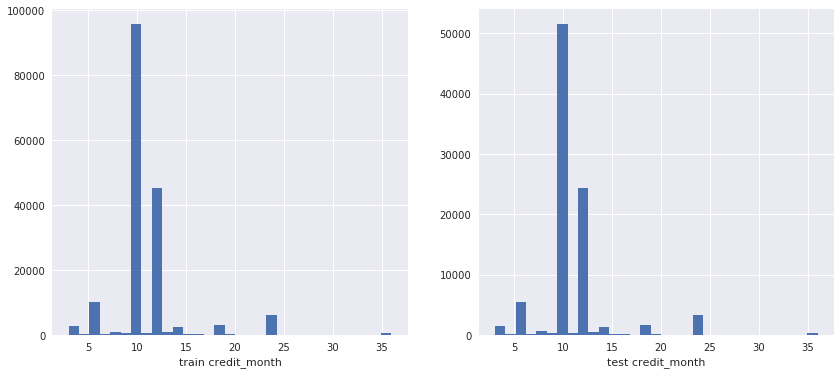

In [33]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.credit_month, bins=31)
plt.xlabel('train credit_month')

plt.subplot(1, 2, 2)
plt.hist(test.credit_month, bins=31)
plt.xlabel('test credit_month')

### tariff_id

In [34]:
print(len(np.unique(train.tariff_id)), len(np.unique(test.tariff_id)))
print(np.unique(train.tariff_id))
print(np.unique(test.tariff_id))

32 30
[ 1.    1.1   1.16  1.17  1.18  1.19  1.2   1.21  1.22  1.23  1.24  1.25
  1.26  1.27  1.28  1.29  1.3   1.32  1.4   1.41  1.43  1.44  1.48  1.5
  1.52  1.56  1.6   1.7   1.9   1.91  1.94  1.96]
[ 1.    1.1   1.16  1.17  1.18  1.19  1.2   1.21  1.22  1.23  1.24  1.25
  1.26  1.27  1.28  1.29  1.3   1.32  1.4   1.41  1.43  1.44  1.48  1.5
  1.56  1.6   1.7   1.9   1.91  1.94]


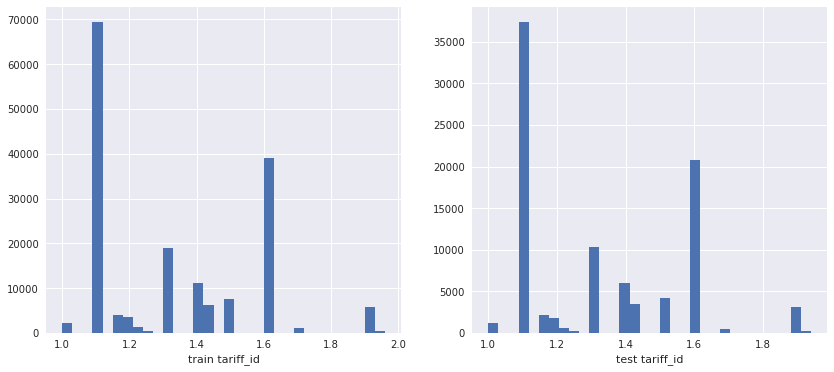

In [35]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.tariff_id, bins=32)
plt.xlabel('train tariff_id')

plt.subplot(1, 2, 2)
plt.hist(test.tariff_id, bins=32)
plt.xlabel('test tariff_id')

### score_shk

In [36]:
train.score_shk = train.score_shk.apply(lambda x: x.replace(',', '.')).astype(np.float64)
test.score_shk = test.score_shk.apply(lambda x: x.replace(',', '.')).astype(np.float64)

In [37]:
train.score_shk = train.score_shk.apply(lambda x: np.round(x, 2))
test.score_shk = test.score_shk.apply(lambda x: np.round(x, 2))

In [38]:
print(len(np.unique(train.score_shk)), len(np.unique(test.score_shk)))
print(len(set(train.score_shk).union(set(test.score_shk))))

96 95
98


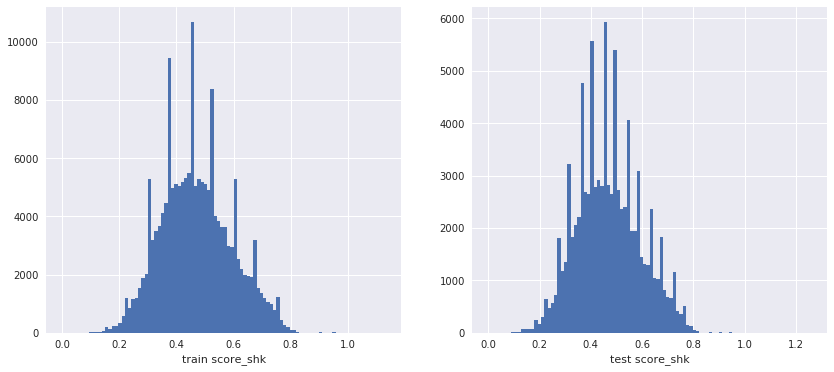

In [39]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.score_shk, bins=98)
plt.xlabel('train score_shk')

plt.subplot(1, 2, 2)
plt.hist(test.score_shk, bins=98)
plt.xlabel('test score_shk')

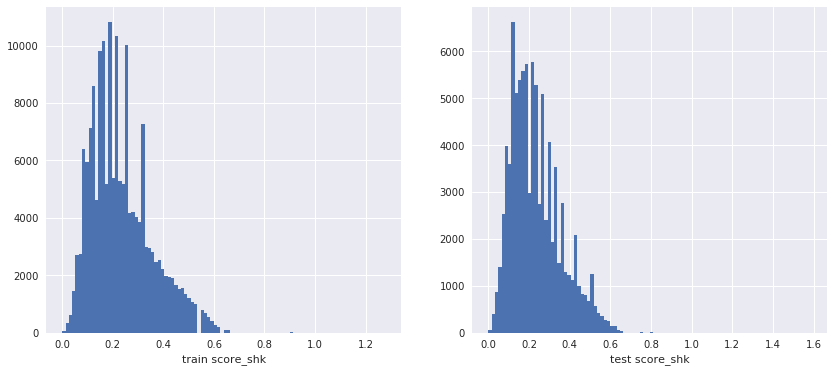

In [40]:
plt.figure(figsize=(14, 6))

p = 2

plt.subplot(1, 2, 1)
plt.hist(np.power(train.score_shk, p), bins=98)
plt.xlabel('train score_shk')

plt.subplot(1, 2, 2)
plt.hist(np.power(test.score_shk, p), bins=98)
plt.xlabel('test score_shk')

### education

In [41]:
train.education = train.education.map({'SCH': 0, 'UGR': 1, 'GRD': 2, 'PGR': 3, 'ACD': 4})
test.education = test.education.map({'SCH': 0, 'UGR': 1, 'GRD': 2, 'PGR': 3, 'ACD': 4})

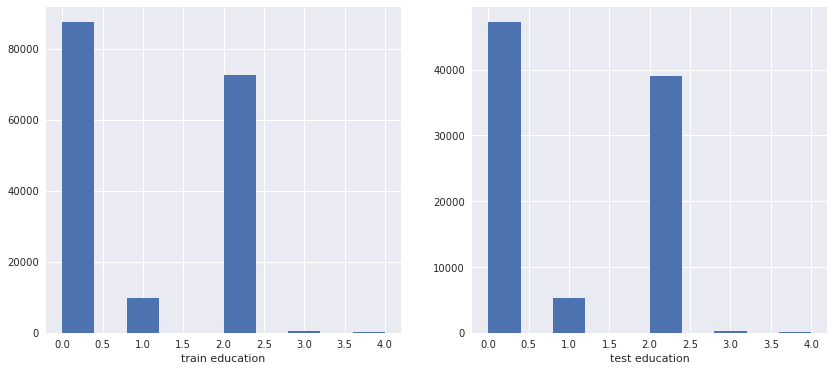

In [42]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.education)
plt.xlabel('train education')

plt.subplot(1, 2, 2)
plt.hist(test.education)
plt.xlabel('test education')

### living_region

In [13]:
bad_names = []

def parse_living_region(data):
    def get_good_name(s_name):
        if s_name.find('КРАЙ') != -1:
            tokens = [x for x in s_name.split() for x in x.split('.')]
            good_name = list(filter(lambda x: x != '' and x != 'КРАЙ', tokens))
            return good_name[0]
        if s_name.find('АО') != -1:
            tokens = [x for x in s_name.split() for x in x.split('.')]
            good_name = list(filter(lambda x: x != '' and x.find('АО') == -1, tokens))
            return good_name[0]
        if s_name.find('ОБЛ') != -1:
            tokens = [x for x in s_name.split() for x in x.split('.')]
            good_name = list(filter(lambda x: x != '' and x != 'ОБЛ' and x != 'ОБЛАСТЬ', tokens))
            return good_name[-1]
        if s_name.find('РЕСП') != -1:
            tokens = [x for x in s_name.split() for x in x.split('.')]
            good_name = list(filter(lambda x: x != '' and x != 'РЕСП' and x != 'РЕСПУБЛИКА', tokens))
            return good_name[0]
        if len(s_name.split()) == 1 and len(s_name.split('.')) == 1:
            return s_name
        if s_name.find('МОСКВА') != -1:
            return 'МОСКВА'
        if s_name.find('ПЕТЕРБУРГ'):
            return 'САНКТ-ПЕТЕРБУРГ'
        if s_name.find('АВТОНОМНЫЙ'):
            return s_name.split()[0]
        if s_name.find('ЕВРЕЙ'):
            return 'ЕВРЕЙСКАЯ'
        if s_name.find('ДАЛЬНИЙ'):
            return 'ДАЛЬНИЙ ВОСТОК'
        if s_name.find('ФЕДЕРАЛЬНЫЙ'):
            return s_name.split()[0]
        bad_names.append(s_name)
        return np.nan
        
    return [get_good_name(x) if x is not np.nan else 'BAD NAME' for x in data]


def reduction_living_region(data):
    def get_good_name(s_name):
        if s_name == 'BAD NAME':
            bad_names.append(np.nan)
        if s_name == '74' or s_name == '98':
            bad_names.append(s_name)
            return 'BAD NAME'
        if s_name == 'АЛТАЙ':
            return 'АЛТАЙ1'
        if s_name == 'РЕСПУБЛИКАТАТАРСТАН':
            return 'ТАТАРСТАН'
        if s_name == 'МОСКВОСКАЯ':
            return 'МОСКОВ'
        if s_name == 'РОССИЯ':
            bad_names.append(s_name)
            return 'BAD NAME'
        if s_name == 'КАМЧАТС??ИЙ':
            return 'КАМЧАТ'
        if s_name == 'ХАНТЫ-МАНСИЙСКИЙ-ЮГРА':
            return 'ХАНТЫ-МАНСИЙ' 
        if s_name.find('СКИЙ') != -1 or s_name.find('СКАЯ') != -1:
            return s_name[:-4]
        return s_name
    
    return [get_good_name(x) for x in data]

In [14]:
train.living_region = reduction_living_region(parse_living_region([s_name for s_name in train['living_region']]))
test.living_region = reduction_living_region(parse_living_region([s_name for s_name in test['living_region']]))

In [15]:
print(len(set(train.living_region)), len(set(test.living_region)))
print(set(train.living_region).union(set(test.living_region)))

89 87
{'СТАВРОПОЛЬ', 'ЯМАЛО-НЕНЕЦКИЙ', 'ЕВРЕЙ', 'ТЮМЕН', 'АЛТАЙC', 'ВЛАДИМИР', 'СМОЛЕН', 'ЗАБАЙКАЛЬ', 'БУРЯТИЯ', 'КАЛУЖ', 'КАРАЧАЕВО-ЧЕРКЕС', 'КЕМЕРОВ', 'ЧУВАШИЯ', 'РЯЗАН', 'СВЕРДЛОВ', 'ИВАНОВ', 'КРАСНОЯР', 'АДЫГЕЯ', 'КУР', 'ВОРОНЕЖ', 'ХАКАСИЯ', 'САХА', 'АРХАНГЕЛЬ', 'ЧУВАШ', 'ЧЕЛЯБИН', 'НИЖЕГОРОД', 'ЛЕНИНГРАД', 'ТУЛЬ', 'ДАГЕСТАН', 'ЛИПЕЦКАЯ', 'ЭВЕНКИЙ', 'АЛТАЙ', 'ОРЁЛ', 'УЛЬЯНОВ', 'ТЫВА', 'МАРИЙ', 'ИРКУТ', 'МОРДОВИЯ', 'BAD NAME', 'ОРЕНБУРГ', 'РОСТОВ', 'ОРЛОВ', 'ОМ', 'НОВГОРОД', 'КАМЧАТ', 'МУРМАН', 'МОСКОВ', 'КАЛИНИНГРАД', 'НЕНЕЦКИЙ', 'БАШКОРТОСТАН', 'КАБАРДИНО-БАЛКАР', 'ТАМБОВ', 'НОВОСИБИР', 'КУРГАН', 'ТОМ', 'САНКТ-ПЕТЕРБУРГ', 'ТАТАРСТАН', 'ЯРОСЛАВ', 'ИНГУШЕТИЯ', 'ПРИМОР', 'КИРОВ', 'КАРЕЛИЯ', 'КОСТРОМ', 'САРАТОВ', 'КОМИ', 'КРАСНОДАР', 'ВОЛОГОД', 'БЕЛГОРОД', 'САМАР', 'УДМУРТ', 'ПЕРМ', 'ЧИТИН', 'СЕВЕРНАЯ', 'ВОЛГОГРАД', 'АМУР', 'МАГАДАН', 'ЧЕЧЕН', 'МОСКВА', 'ТВЕР', 'САХАЛИН', 'КАЛМЫКИЯ', 'ПСКОВ', 'ПЕНЗЕН', 'ХАНТЫ-МАНСИЙ', 'ХАБАРОВ', 'БРЯН', 'АСТРАХАН', 'ГОРЬКОВ', 'ЧУКОТ'}


In [17]:
regions = ['СТАВРОПОЛЬ', 'ЯМАЛО-НЕНЕЦКИЙ', 'ЕВРЕЙ', 'ТЮМЕН', 'АЛТАЙC', 'ВЛАДИМИР', 'СМОЛЕН', 'ЗАБАЙКАЛЬ', 'БУРЯТИЯ', 'КАЛУЖ', 'КАРАЧАЕВО-ЧЕРКЕС', 'КЕМЕРОВ', 'ЧУВАШИЯ', 'РЯЗАН', 'СВЕРДЛОВ', 'ИВАНОВ', 'КРАСНОЯР', 'АДЫГЕЯ', 'КУР', 'ВОРОНЕЖ', 'ХАКАСИЯ', 'САХА', 'АРХАНГЕЛЬ', 'ЧУВАШ', 'ЧЕЛЯБИН', 'НИЖЕГОРОД', 'ЛЕНИНГРАД', 'ТУЛЬ', 'ДАГЕСТАН', 'ЛИПЕЦКАЯ', 'ЭВЕНКИЙ', 'АЛТАЙ', 'ОРЁЛ', 'УЛЬЯНОВ', 'ТЫВА', 'МАРИЙ', 'ИРКУТ', 'МОРДОВИЯ', 'BAD NAME', 'ОРЕНБУРГ', 'РОСТОВ', 'ОРЛОВ', 'ОМ', 'НОВГОРОД', 'КАМЧАТ', 'МУРМАН', 'МОСКОВ', 'КАЛИНИНГРАД', 'НЕНЕЦКИЙ', 'БАШКОРТОСТАН', 'КАБАРДИНО-БАЛКАР', 'ТАМБОВ', 'НОВОСИБИР', 'КУРГАН', 'ТОМ', 'САНКТ-ПЕТЕРБУРГ', 'ТАТАРСТАН', 'ЯРОСЛАВ', 'ИНГУШЕТИЯ', 'ПРИМОР', 'КИРОВ', 'КАРЕЛИЯ', 'КОСТРОМ', 'САРАТОВ', 'КОМИ', 'КРАСНОДАР', 'ВОЛОГОД', 'БЕЛГОРОД', 'САМАР', 'УДМУРТ', 'ПЕРМ', 'ЧИТИН', 'СЕВЕРНАЯ', 'ВОЛГОГРАД', 'АМУР', 'МАГАДАН', 'ЧЕЧЕН', 'МОСКВА', 'ТВЕР', 'САХАЛИН', 'КАЛМЫКИЯ', 'ПСКОВ', 'ПЕНЗЕН', 'ХАНТЫ-МАНСИЙ', 'ХАБАРОВ', 'БРЯН', 'АСТРАХАН', 'ГОРЬКОВ', 'ЧУКОТ']

In [18]:
d = dict((y, x) for x, y in enumerate(regions))
train.living_region = train.living_region.map(d)
test.living_region = test.living_region.map(d)

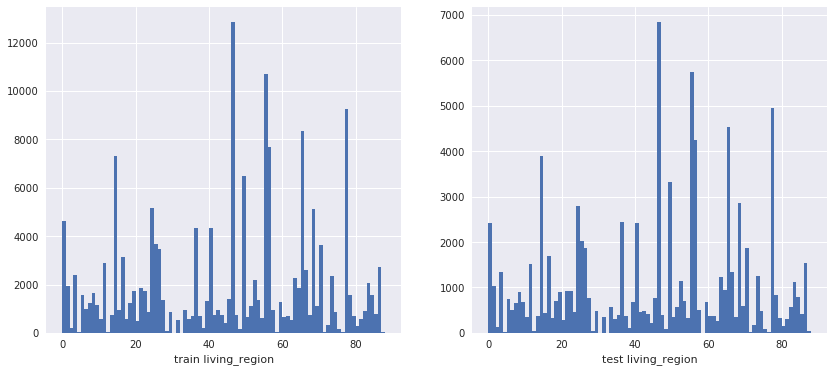

In [19]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.living_region, bins=88)
plt.xlabel('train living_region')

plt.subplot(1, 2, 2)
plt.hist(test.living_region, bins=88)
plt.xlabel('test living_region')

### monthly_income

In [49]:
train.monthly_income = train.monthly_income.fillna(train.monthly_income.mean()).apply(lambda x: np.round(x / 1000))
test.monthly_income = test.monthly_income.fillna(test.monthly_income.mean()).apply(lambda x: np.round(x / 1000))

In [50]:
print(len(set(train.monthly_income.dropna())), len(set(test.monthly_income.dropna())))

226 202


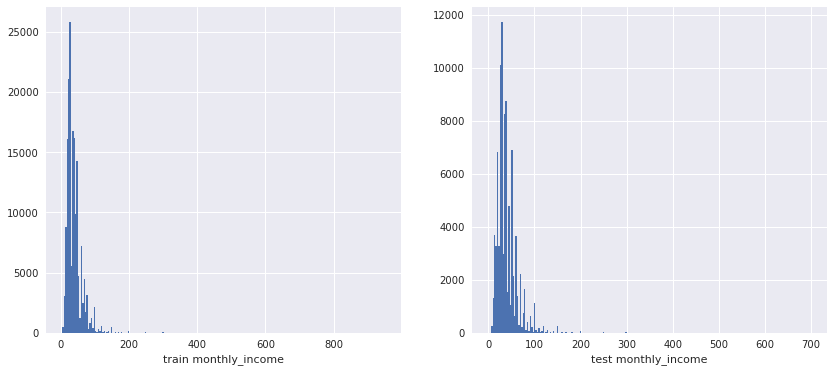

In [51]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.monthly_income, bins=226)
plt.xlabel('train monthly_income')

plt.subplot(1, 2, 2)
plt.hist(test.monthly_income, bins=226)
plt.xlabel('test monthly_income')

### credit_count

In [52]:
print(len(set(train.credit_count.dropna())), len(set(test.credit_count.dropna())))
print(len(train.credit_count) - len(train.credit_count.dropna()))
print(len(test.credit_count) - len(test.credit_count.dropna()))

21 19
9230
4703


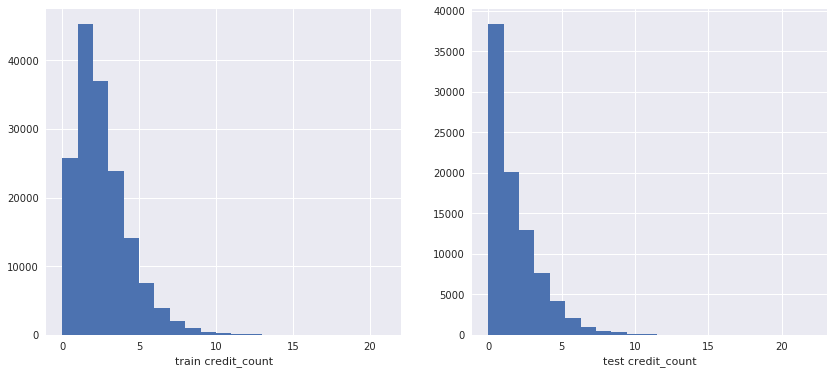

In [53]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.credit_count.dropna(), bins=21)
plt.xlabel('train credit_count')

plt.subplot(1, 2, 2)
plt.hist(test.credit_count.dropna(), bins=21)
plt.xlabel('test credit_count')

### overdue_credit_count

In [54]:
print(len(train.overdue_credit_count) - len(train.overdue_credit_count.dropna()))
print(len(test.overdue_credit_count) - len(test.overdue_credit_count.dropna()))

9230
4703


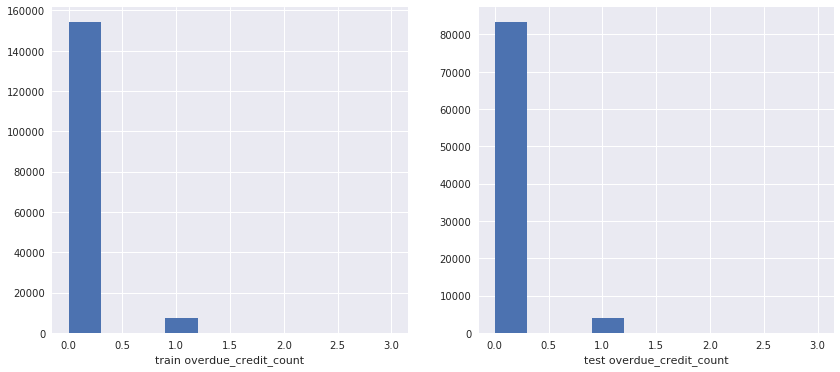

In [55]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train.overdue_credit_count.dropna())
plt.xlabel('train overdue_credit_count')

plt.subplot(1, 2, 2)
plt.hist(test.overdue_credit_count.dropna())
plt.xlabel('test overdue_credit_count')